In [13]:
import os
import numpy as np
import pandas as pd

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


In [70]:
test = torch.load("LSTMData-0.001.pt")

In [71]:
test = torch.from_numpy(test[0][0][:4000])

In [37]:
def Masking(channel: torch.Tensor, window: int= 150):
    '''
    Set to zero 
    Input: \\
    -channel = Tensor \\
    -window = Number of samples to set to zero
    Output: Numpy array masked
    '''
    channel_size = len(channel)

    mask = torch.zeros(window)
    first = torch.randint(0,channel_size- window,(1,1))

    masked = torch.cat([channel[:first],
                        mask,
                        channel[first+window:]])
    return masked

In [49]:
def DCVoltage(channel : torch.Tensor, max_magnitude: float = 0.5):
    ''' 
    Add a DC component between [-max_mangitude, max_magnitude]\\
    Input:  \\
    -channel = Tensor \\
    -max_magnitude = max value to be added
    Output: Numpy array 
    '''
    dc_comp = (torch.rand(1)*2 - 1)*max_magnitude
    dispaced_channel = channel + dc_comp
    return dispaced_channel    

In [99]:
def GaussianNoise(channel: np.array, std: float = 10):
    '''
    Add Gaussian Noise with zero mean and std deviation
    Input:  -channel = Numpy array
            -std = Gaussian std
    Output: Channel with additive gaussian noise added
    '''
    channel_size = len(channel)
    noise = torch.normal(mean = 0.0,std = std, size = (1,channel_size))
    # noise = np.random.normal(loc = 0, scale= std, size= channel_size)
    noisy_channel = channel + noise
    return noisy_channel

In [100]:
test.shape

torch.Size([1, 4000])

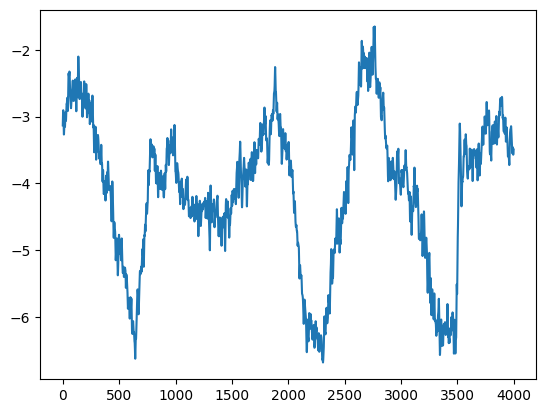

In [98]:
plt.plot(GaussianNoise(test).squeeze())
plt.show()

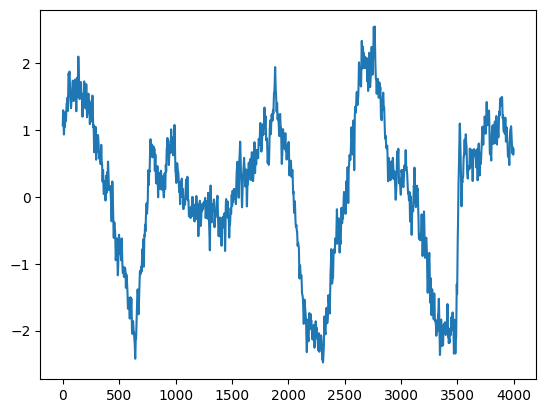

In [86]:
plt.plot(test.squeeze())
plt.show()